# Regresión Logística

### Integrantes
* Yesid Shair Rosas Toro
* Samara Smith Rincon Montaña
* Cristian Camilo Quiceno Laurente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

1- Usando como base el siguiente dataset, desarrolle un sistema de clasificación. Solo debe usar las tres dependencias agregadas como base en el script.

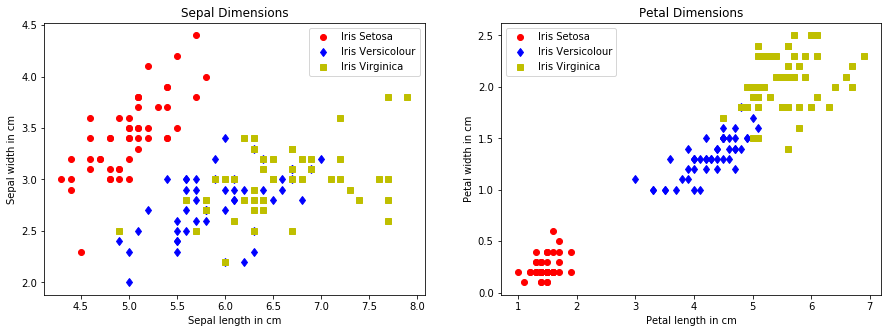

In [2]:
# cargar data
data = sio.loadmat('Datasets/dataFI.mat')
data = np.array(list(data.values()))

# se cargan las caracteriticas de las plantas 
X=data[3]
# se cargan las etiquetas.
t=data[4]
t= np.argmax(t, axis=1)

plt.subplots(1,2,figsize=(15,5))
plt.subplot(1, 2, 1)

# Sepal Dimensions
plt.title("Sepal Dimensions")
plt.plot(X[0:49,0], X[0:49,1],'or')
plt.plot(X[50:99,0], X[50:99,1],'db')
plt.plot(X[100:,0], X[100:,1],'sy')

plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")
plt.legend(["Iris Setosa","Iris Versicolour","Iris Virginica"])

plt.subplot(1, 2, 2)

# Petal Dimensions
plt.title("Petal Dimensions")
plt.plot(X[0:49, 2], X[0:49, 3],'or')
plt.plot(X[50:99,2], X[50:99,3],'db')
plt.plot(X[100:, 2], X[100:, 3],'sy')

plt.xlabel("Petal length in cm")
plt.ylabel("Petal width in cm")
plt.legend(["Iris Setosa","Iris Versicolour","Iris Virginica"])
plt.show()

2 - Programe cinco funciones (0.8):

    - Función de costo para la función sigmoidal.
    - Función para calcular el grandiente.
    - Función sigmoidal.
    - Función de normalización de X.
    - Función de exactitud.


In [3]:
def costo(t, tp, pred=0.00002):
    error = np.zeros(len(t))
    
    for i in range(len(t)):
        param = 0
        if t[i] == 1:
            param = tp[i]
        else:
            param = 1 - tp[i]
            
        if param == 0:
            param = pred
            
        error[i] = -np.log(param)
    
    return np.sum(error)

def grad(w, X, y, t, a = 0.0002):
    diff = y - t
    
    for i in range(len(w)):
        dp = np.mean(diff @ X.T[i])
        w[i] = w[i] - (a * dp)
        
    return w

def sigm(X):
    return 1 / (1 + np.exp(-X))

def norm(X):
    for i in range(1, X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    return X

def exact(t, tp):
    return 1 - (np.sum(np.abs(t - tp)) / len(t))

3- Desarrolle un algoritmo biclase, que use gradiente descendiente para realizar la califiación entre las clases. 
Recuerde que el gradiente esta dado por la formula:

$w_{j} = w_{j} - \alpha \Delta$

La función desarrollada debería recibir como parámetro $X$ y $t$.
La función de error debe ser basada en el error logístico.
Debe retornar w, $\hat{t}$, número de iteración y error obtenido (0.8).

In [4]:
def regresion_logistica_biclase(X, t):
    m = X.shape[1]
    np.random.seed(0)
    w = np.random.rand(m)
    
    y = sigm(X @ w)

    error = costo(t, y)

    n = 0
    while error > 0.2 and n < 30000:
        w = grad(w, X, y, t)
        y = sigm(X @ w)
        
        error = costo(t, y)
        n += 1
    
    p = umbral(y)
        
    return w, p, error, n

def umbral(y):
    y[y <  .5] = 0
    y[y >= .5] = 1
    return y

4- Programe una función para usar el $holdout$ $method$ aleatorio. La separación del conjunto de pruebas con el de entrenamiento debe ser con base parámetros que digan cuanto porcentaje se desea usar para entrenamiento y cuanto para pruebas (use w para predecir las clases del conjunto de pruebas). Puede usar cómo parámetro por defecto el 60% y 40% respectivamente (0.5). 

In [5]:
def holdout(Xo, to, porc_entrenam=0.6):
    porc_prueba = 1 - porc_entrenam
    
    m = len(Xo[0])
    n = len(to)
    
    len_entr = round(n * porc_entrenam)
    Xe = np.ones((len_entr, m))
    te = np.ones(len_entr)
    e  = 0
    
    len_prueb = round(n * porc_prueba)
    Xp = np.ones((len_prueb, m))
    tp = np.ones(len_prueb)
    p  = 0
    
    for i in range(n):
        val = np.random.random() 
        if val < porc_entrenam and e < len_entr:
            Xe[e,:] = Xo[i,:]
            te[e] = to[i]
            e += 1
        elif p < len_prueb:
            Xp[p,:] = Xo[i,:]
            tp[p] = to[i]
            p += 1
    
    return Xe, te, Xp, tp

5- Use la clase Iris Setosa e Iris Versicolour para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.7).

In [6]:
def obtenerXt(clase):
    Xc = np.copy(X[0+(50*clase):50+(50*clase)])
    tc = np.copy(t[0+(50*clase):50+(50*clase)])
    return Xc, tc

def obtenerClase(cl):
    Xc = np.copy(X)
    tc  = np.copy(t)
    
    tc[tc == cl] = -1
    tc[tc != -1] = 1
    tc[tc == -1] = 0
    
    return Xc, tc

def obtenerClases(cl1, cl2):
    Xc1, tc1 = obtenerXt(cl1)
    Xc2, tc2 = obtenerXt(cl2)
    
    Xcs = np.concatenate((Xc1, Xc2))
    tcs = np.concatenate((tc1, tc2))
    
    tcs[tcs == cl1] = -1
    tcs[tcs != -1] = 1
    tcs[tcs == -1] = 0
    
    return Xcs, tcs

Completado en 22257 Iteraciones
Con un error de 0.19999586803396807

Conjunto de entrenamiento	(100.0% de exactitud)
Conjunto de pruebas		(100.0% de exactitud)


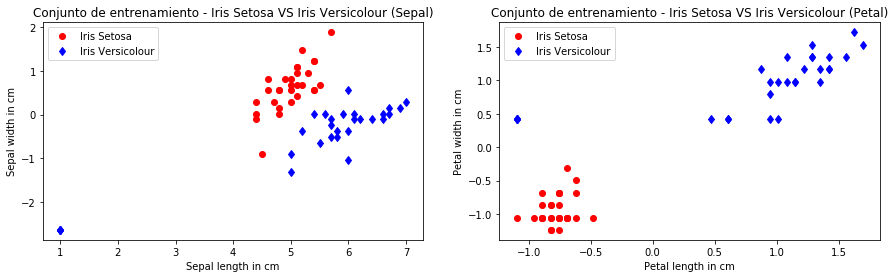

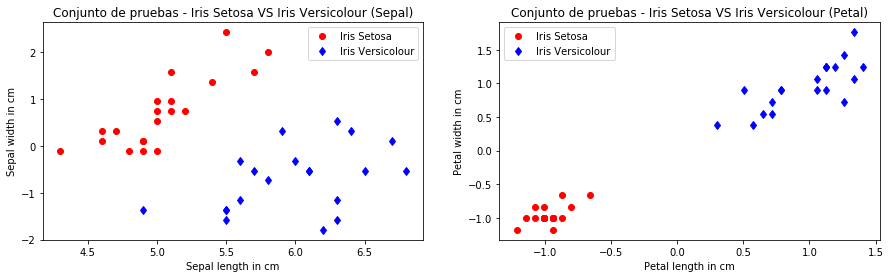

In [7]:
def graficarClases(X, y, c1, c2, tipo):
    colores = ['or', 'db', 'sy']
    caracteristicas = ["Sepal", "Petal"]
    etiquetas = ["Iris Setosa", "Iris Versicolour", "Iris Virginica", "Otros"]
    
    plt.subplots(1,2,figsize=(15,4))
    
    for j in range(2):
        plt.subplot(1, 2, j+1)
        plt.plot(X[y == 0,    0+(2*j)], X[y == 0, 1+(2*j)], colores[c1])
        
        if c2 == 3:
            plt.scatter(X[y == 1, 0+(2*j)], X[y == 1, 1+(2*j)], color='black', marker='x', alpha=0.5)
        else:
            plt.plot(X[y == 1,    0+(2*j)], X[y == 1, 1+(2*j)], colores[c2])

        plt.title(tipo + " - " + etiquetas[c1] + " VS " + etiquetas[c2] + " (" + caracteristicas[j] + ")")
        plt.xlabel(caracteristicas[j] + " length in cm")
        plt.ylabel(caracteristicas[j] + " width in cm" )
        plt.legend([etiquetas[c1], etiquetas[c2]])  
        
    plt.show()

def clasificar(clase1, clase2):
    Xc, tc = obtenerClases(clase1, clase2)
    Xe, te, Xp, tp = holdout(Xc, tc)

    Xe = norm(Xe)
    Xp = norm(Xp)

    w, p, error, n = regresion_logistica_biclase(Xe, te)

    ye = umbral(Xe @ w)
    yp = umbral(Xp @ w)

    exace = exact(te, ye) * 100
    exacp = exact(tp, yp) * 100

    print("Completado en " + str(n) + " Iteraciones")
    print("Con un error de " + str(error) + "\n")

    print("Conjunto de entrenamiento\t(" + str(exace) +"% de exactitud)")
    print("Conjunto de pruebas\t\t(" + str(exacp) +"% de exactitud)")

    graficarClases(Xe, ye, clase1, clase2, 'Conjunto de entrenamiento')
    graficarClases(Xp, yp, clase1, clase2, 'Conjunto de pruebas')
    
clasificar(0, 1)

6- Use la clase Iris Versicolour e Iris Virginica para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.6).

Completado en 30000 Iteraciones
Con un error de 4.4325378644796505

Conjunto de entrenamiento	(96.66666666666667% de exactitud)
Conjunto de pruebas		(95.0% de exactitud)


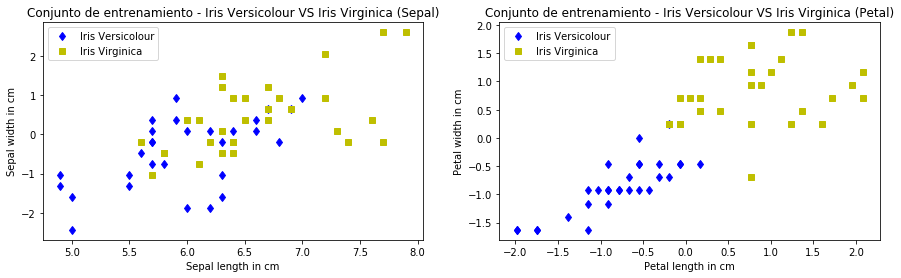

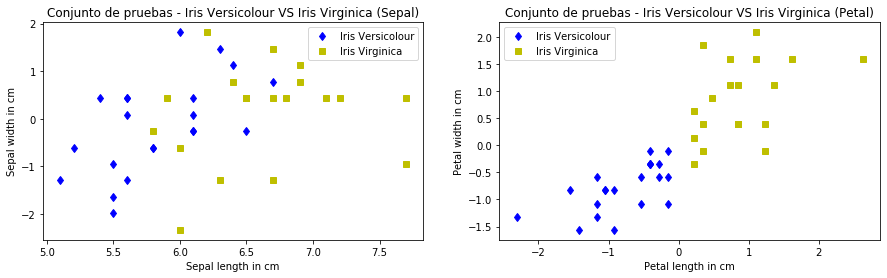

In [8]:
clasificar(1, 2)

7- Use la clase Iris Setosa e Iris Virginica para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.6).

Completado en 13043 Iteraciones
Con un error de 0.1999942821420025

Conjunto de entrenamiento	(100.0% de exactitud)
Conjunto de pruebas		(100.0% de exactitud)


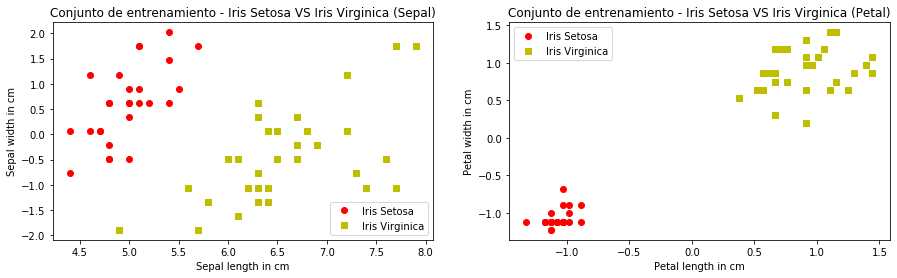

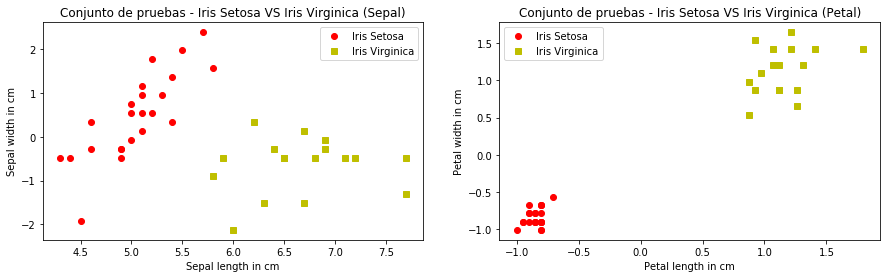

In [9]:
clasificar(0, 2)

8- Ahora realice un entrenamiento uno contra todos usando las tres clases de Iris. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (70%) y el conjunto de prueba (30%). Recuerde normalizar las características (1.0).

Clase Iris Setosa:

Completado en 22955 Iteraciones
Con un error de 0.19999643861934743

Conjunto de entrenamiento	(100.0% de exactitud)
Conjunto de pruebas		(100.0% de exactitud)



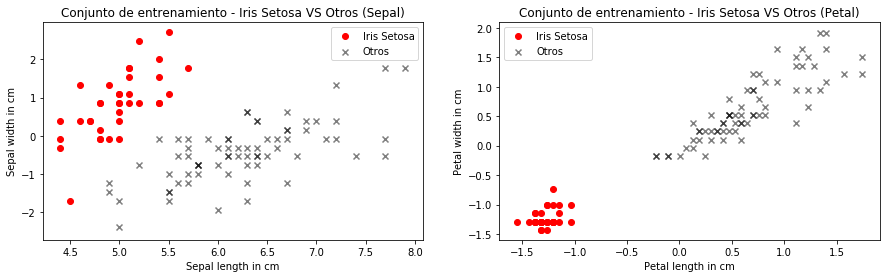

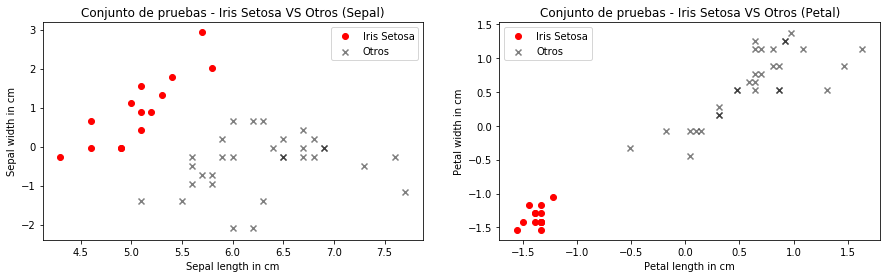

Clase Iris Versicolour:

Completado en 30000 Iteraciones
Con un error de 53.37365544182886

Conjunto de entrenamiento	(76.19047619047619% de exactitud)
Conjunto de pruebas		(71.11111111111111% de exactitud)



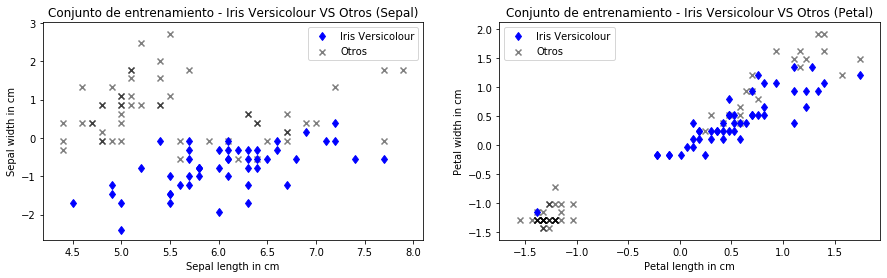

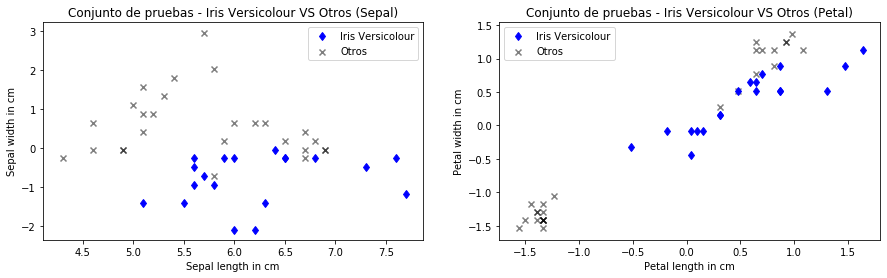

Clase Iris Virginica:

Completado en 30000 Iteraciones
Con un error de 6.0163103026073825

Conjunto de entrenamiento	(96.19047619047619% de exactitud)
Conjunto de pruebas		(88.88888888888889% de exactitud)



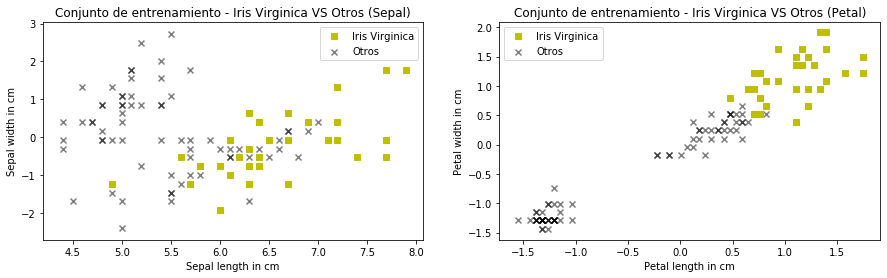

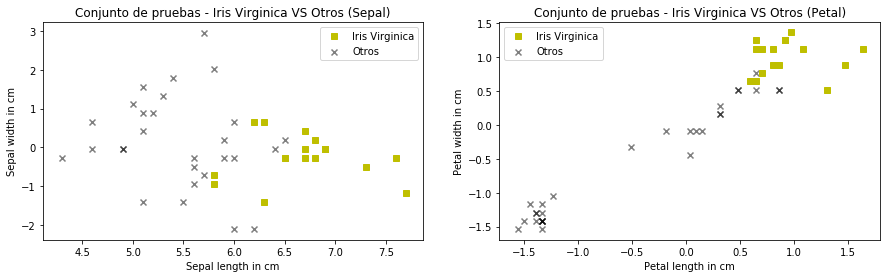

In [10]:
clases = [0, 1, 2]
etiquetas = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]

for i in clases:
    print("Clase " + etiquetas[i] + ":\n")
    
    Xc, tc = obtenerClase(i)
    Xe, te, Xp, tp = holdout(Xc, tc, porc_entrenam=0.7)
    
    Xe = norm(Xe)
    Xp = norm(Xp)

    w, p, error, n = regresion_logistica_biclase(Xe, te)
    
    ye = umbral(Xe @ w)
    yp = umbral(Xp @ w)

    exace = exact(te, ye) * 100
    exacp = exact(tp, yp) * 100

    print("Completado en " + str(n) + " Iteraciones")
    print("Con un error de " + str(error) + "\n")
    
    print("Conjunto de entrenamiento\t(" + str(exace) +"% de exactitud)")
    print("Conjunto de pruebas\t\t(" + str(exacp) +"% de exactitud)\n")

    graficarClases(Xe, ye, i, 3, 'Conjunto de entrenamiento')
    graficarClases(Xp, yp, i, 3, 'Conjunto de pruebas')